# Análisis exploratorio de incidencia delictiva en México

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df = pd.read_csv('data/delitos.csv')

In [23]:
if 'fecha' in df.columns:
    df['fecha'] = pd.to_datetime(df['fecha'])
else:
    # Si no existe, la creamos al vuelo (ajusta si tus columnas se llaman diferente)
    # Asumiendo que tienes 'anio' y 'mes' numérico
    df['fecha'] = pd.to_datetime(df['anio'].astype(str) + '-' + df['mes'].astype(str) + '-01')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153600 entries, 0 to 153599
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   anio            153600 non-null  int64         
 1   clave_ent       153600 non-null  int64         
 2   entidad         153600 non-null  object        
 3   tipo_de_delito  153600 non-null  object        
 4   nombre_mes      153600 non-null  object        
 5   fecha           153600 non-null  datetime64[ns]
 6   frecuencia      153600 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 8.2+ MB
None


#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

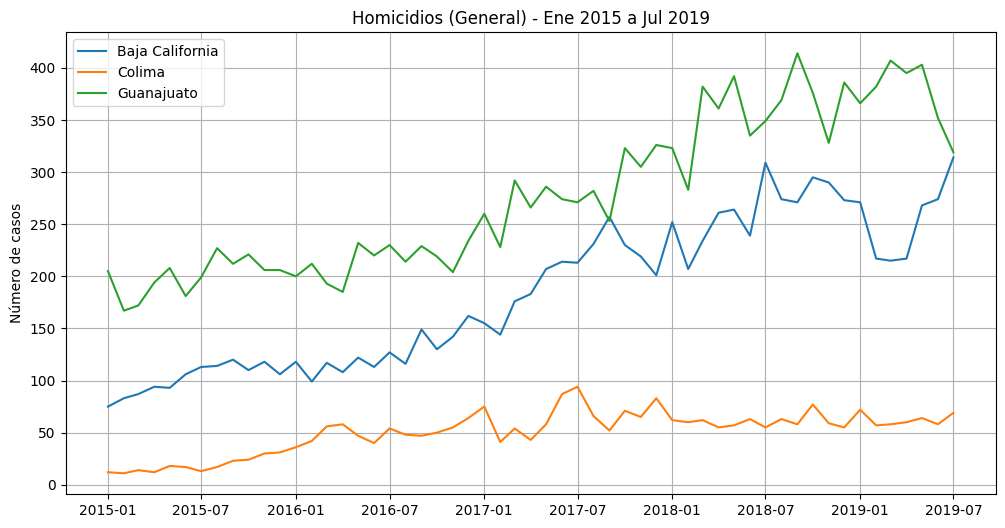

In [24]:
estados_interes = ['Colima', 'Baja California', 'Guanajuato']

filtro = (
    (df['entidad'].isin(estados_interes)) & 
    (df['tipo_de_delito'] == 'Homicidio') & 
    (df['fecha'] >= '2015-01-01') & 
    (df['fecha'] <= '2019-07-31')
)

df_ej1 = df[filtro].copy()

if not df_ej1.empty:
    df_pivot = df_ej1.pivot_table(index='fecha', columns='entidad', values='frecuencia', aggfunc='sum')
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_pivot)
    plt.title('Homicidios (General) - Ene 2015 a Jul 2019')
    plt.legend(df_pivot.columns)
    plt.ylabel('Número de casos')
    plt.grid(True)
    plt.show()
else:
    print("No se encontraron datos con esos filtros")

#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [25]:
print("--- RESPUESTAS ADAPTADAS (Sin subtipos) ---")

q1 = df[
    (df['entidad'] == 'Colima') & 
    (df['anio'] == 2018) & 
    (df['tipo_de_delito'] == 'Homicidio')
]['frecuencia'].sum()
print(f"1. Homicidios totales en Colima (2018): {q1}")

q2 = df[
    (df['anio'] == 2019) & 
    (df['tipo_de_delito'] == 'Robo') 
]['frecuencia'].sum()
print(f"2. Robos totales (General) en 2019: {q2}")
print("   (Nota: Al limpiar los datos, se agruparon todos los tipos de robo)")

delitos_graves = ['Homicidio', 'Feminicidio']
q3 = df[df['tipo_de_delito'].isin(delitos_graves)].groupby('anio')['frecuencia'].sum()
print(f"\n3. Homicidios + Feminicidios por año:\n{q3}")

feminicidios = df[df['tipo_de_delito'] == 'Feminicidio']

if not feminicidios.empty:
    fila_max_fem = feminicidios.loc[feminicidios['frecuencia'].idxmax()]
    print(f"\n4. Mayor número de feminicidios en un mes:")
    print(f"   Entidad: {fila_max_fem['entidad']}")
    print(f"   Fecha: {fila_max_fem['fecha']}")
    print(f"   Cantidad: {fila_max_fem['frecuencia']}")
else:
    print("\n4. No se encontraron registros bajo el tipo 'Feminicidio'.")

if not feminicidios.empty:
    fem_anual = feminicidios.groupby(['anio', 'entidad'])['frecuencia'].sum().reset_index()
    fila_max_anual = fem_anual.loc[fem_anual['frecuencia'].idxmax()]
    print(f"\n5. Estado con más feminicidios en un año:")
    print(f"   Estado: {fila_max_anual['entidad']}")
    print(f"   Año: {fila_max_anual['anio']}")
    print(f"   Total: {fila_max_anual['frecuencia']}")

--- RESPUESTAS ADAPTADAS (Sin subtipos) ---
1. Homicidios totales en Colima (2018): 726.0
2. Robos totales (General) en 2019: 766096.0
   (Nota: Al limpiar los datos, se agruparon todos los tipos de robo)



3. Homicidios + Feminicidios por año:
anio
2015    31744.0
2016    36018.0
2017    42068.0
2018    45385.0
2019    45822.0
2020    44223.0
2021    44960.0
2022    43845.0
2023    42846.0
2024    22307.0
Name: frecuencia, dtype: float64

4. Mayor número de feminicidios en un mes:
   Entidad: México
   Fecha: 2020-07-01 00:00:00
   Cantidad: 19.0

5. Estado con más feminicidios en un año:
   Estado: México
   Año: 2020
   Total: 151.0


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

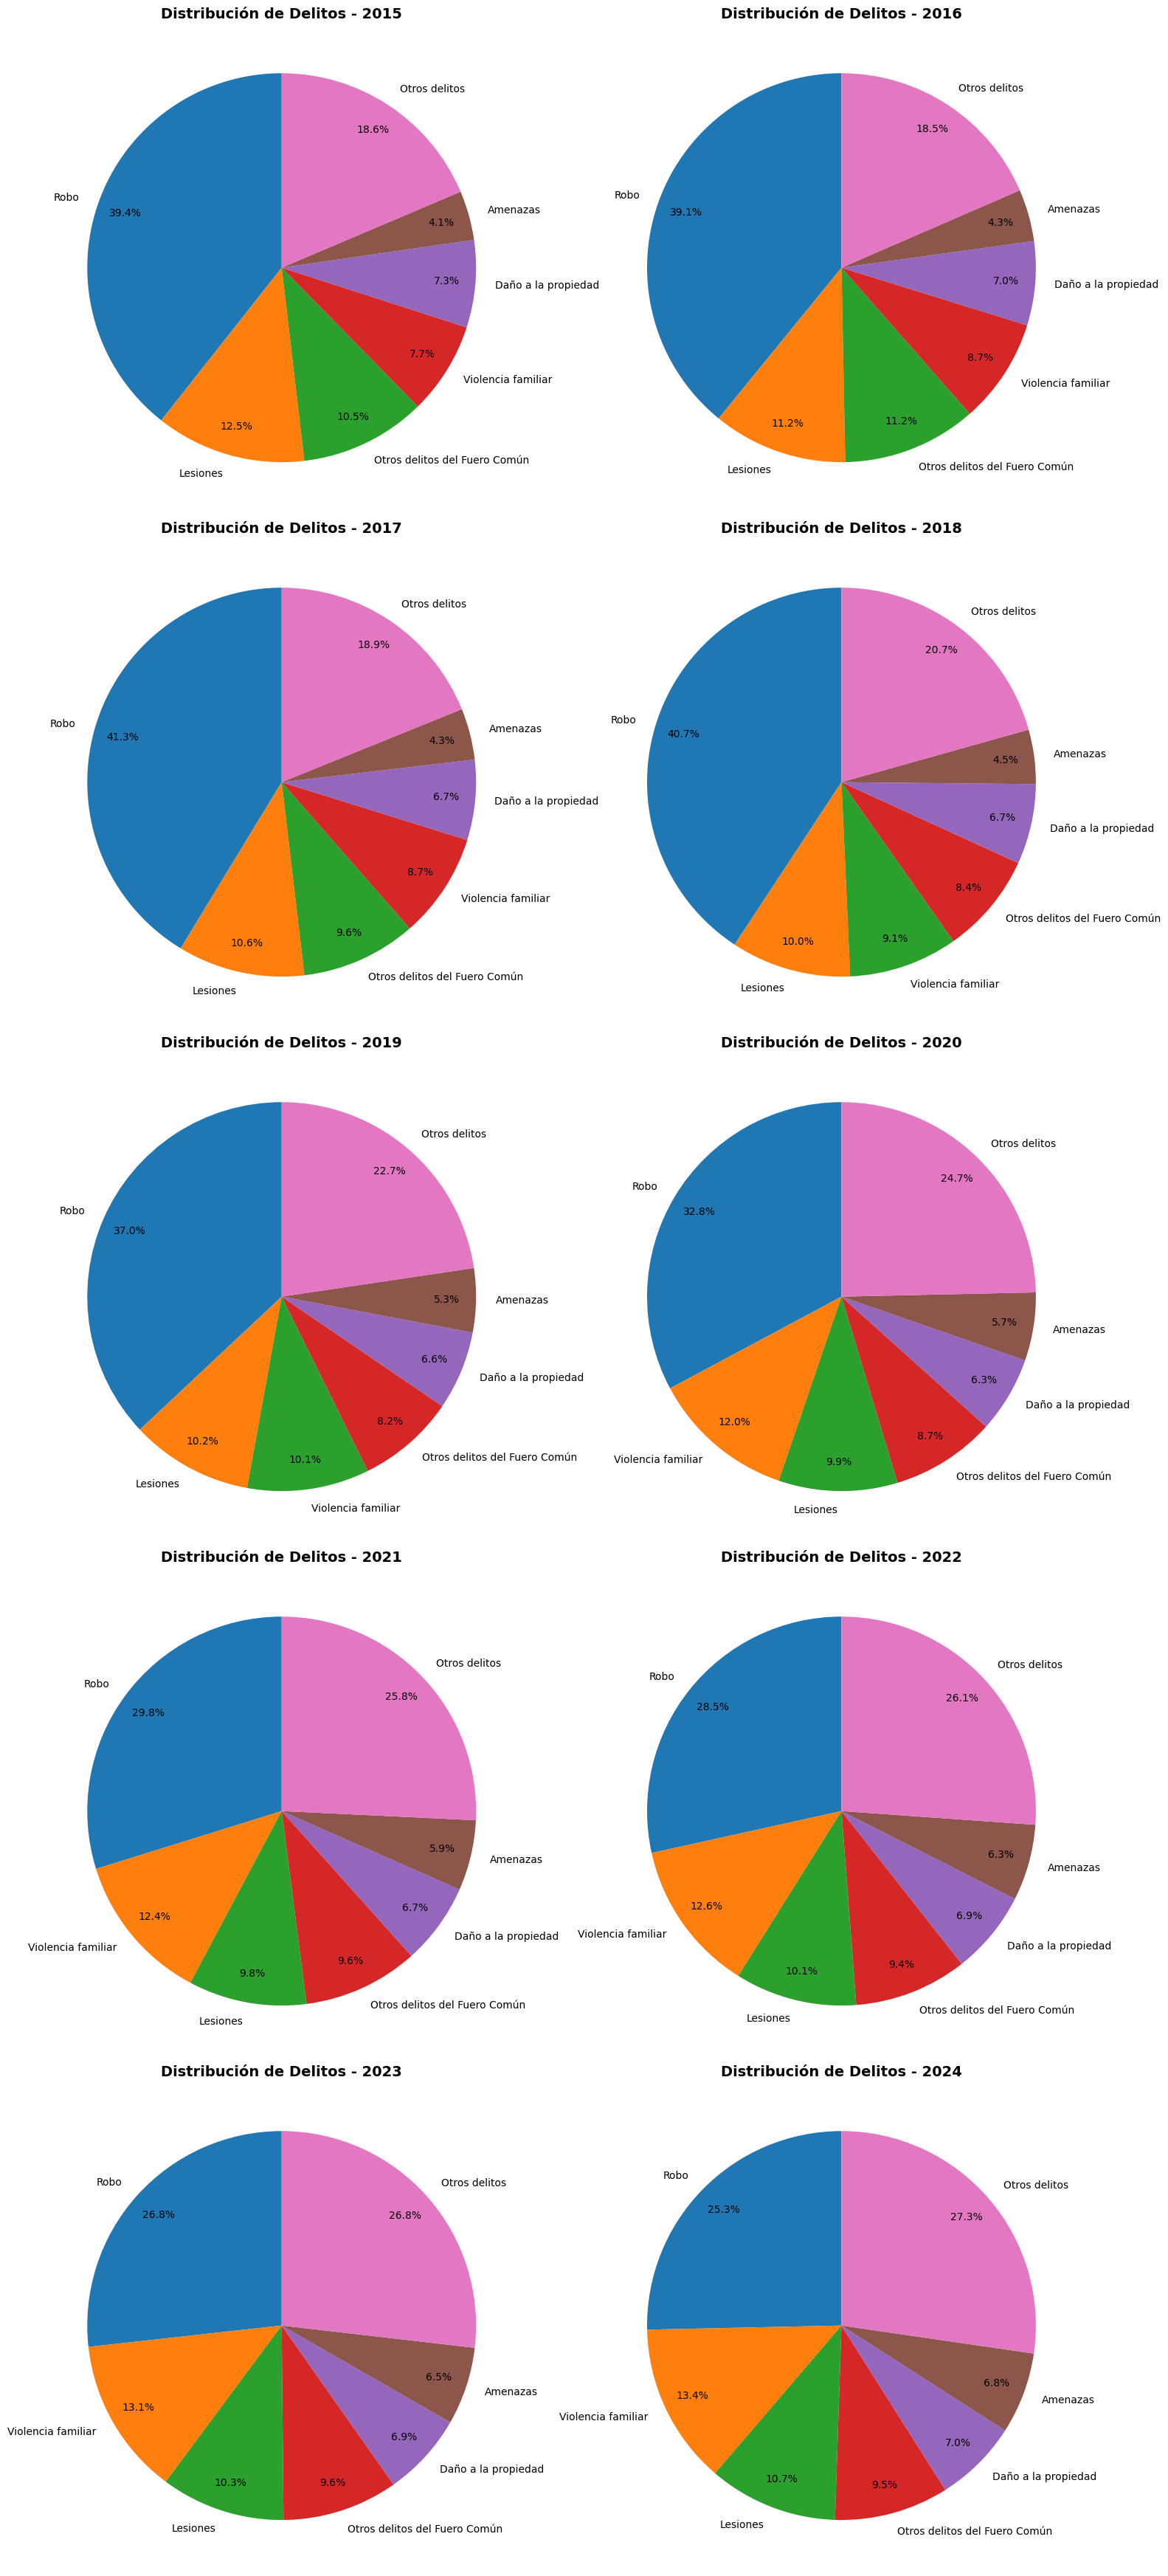

In [26]:
anios = sorted(df['anio'].unique())

filas = int(np.ceil(len(anios) / 2))

fig, axs = plt.subplots(filas, 2, figsize=(16, 7 * filas))
axs = axs.flatten() 

for i, anio in enumerate(anios):
    datos = df[df['anio'] == anio].groupby('tipo_de_delito')['frecuencia'].sum().sort_values(ascending=False)
    
    if len(datos) > 7:
        top_datos = datos.iloc[:6]
        otros_suma = datos.iloc[6:].sum()
        otros_serie = pd.Series([otros_suma], index=['Otros delitos'])
        datos_plot = pd.concat([top_datos, otros_serie])
    else:
        datos_plot = datos

    axs[i].pie(datos_plot, 
               labels=datos_plot.index, 
               autopct='%1.1f%%', 
               startangle=90,
               pctdistance=0.85, 
               labeldistance=1.1,
               textprops={'fontsize': 10})
               
    axs[i].set_title(f'Distribución de Delitos - {anio}', fontsize=14, fontweight='bold')

for j in range(len(anios), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [27]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

,clave_entidad,entidad,poblacion
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0


In [28]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_ent', 'Entidad':'entidad_nombre', 'Poblacion':'poblacion'})

df_tasa = pd.merge(df, pobs[['clave_ent', 'poblacion']], on='clave_ent', how='left')

df_tasa['tasa'] = (df_tasa['frecuencia'] / df_tasa['poblacion']) * 100000

print(df_tasa[['entidad', 'tipo_de_delito', 'frecuencia', 'poblacion', 'tasa']].head())

          entidad tipo_de_delito  frecuencia  poblacion      tasa
0  Aguascalientes         Aborto         0.0  1312544.0  0.000000
1  Aguascalientes         Aborto         0.0  1312544.0  0.000000
2  Aguascalientes         Aborto         0.0  1312544.0  0.000000
3  Aguascalientes         Aborto         0.0  1312544.0  0.000000
4  Aguascalientes         Aborto         3.0  1312544.0  0.228564


In [29]:
homicidios_2018 = df_tasa[(df_tasa['anio'] == 2018) & (df_tasa['tipo_de_delito'] == 'Homicidio')]
homicidios_estado_2018 = homicidios_2018.groupby(['entidad', 'poblacion'])['frecuencia'].sum().reset_index()

homicidios_estado_2018['tasa_anual'] = (homicidios_estado_2018['frecuencia'] / homicidios_estado_2018['poblacion']) * 100000

print("\n--- Tasa de Homicidios 2018 por Estado (Top 5) ---")
print(homicidios_estado_2018.sort_values('tasa_anual', ascending=False).head())


--- Tasa de Homicidios 2018 por Estado (Top 5) ---
             entidad  poblacion  frecuencia  tasa_anual
6   Ciudad de México   711235.0      1979.0  278.248399
1    Baja California  3315766.0      3169.0   95.573692
11          Guerrero  3533251.0      2716.0   76.869716
10        Guanajuato  5853677.0      4298.0   73.423935
5          Chihuahua  2954915.0      2089.0   70.695773
